# Renat Rezyapov

## Which NHL player statistics have the largest effect on ranking position in the following season?

In order to answer this question, the change in ranking between the two consecutive seasons for players will serve as a point of comparisson with statistics in the earlier year. 
The purpose of the question is to bring attention to which parameters the players can focus on imrproving in order to advance in the ranking based on the number of points in the next season. 

In [1]:
# Importing the libraries nessesary for exploratory analysis, as well as the data.

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
df17 = pd.read_csv('../data/processed/clean2017.csv')
df18 = pd.read_csv('../data/processed/clean2018.csv')

## Clarification regarding what each column in the data represents:

- Rk = Ranking
- GP = Games Played
- G = Goals
- A = Assists
- P = Points (Sum of G and A)
- PIM = Penalty Infraction Minutes
- +/- = Plus/minus
- TOI = Time on Ice
- PPG = Power Play Goals
- GWG = Game-Winning Points
- PPP = Power Play Points
- G/GP = Goals per Games Played
- A/GP = Assists per Games Played
- P/GP = Points per Games Played
- SHOTS = Shots
- SH% = Shot Percentage
- HITS = Hits
- BS = Blocked Shots

In [2]:
# Chaged the formatting of the TOI column so it is in seconds instad of mm:ss.

def convert_time(time_str):
    minutes, seconds = time_str.split(':')
    return int(minutes)*60+int(seconds)

df17['TOI'] = df17['TOI'].apply(convert_time)
df18['TOI'] = df18['TOI'].apply(convert_time)

In [3]:
# Merged the 2017 set and 2018 set, added suffixes to differentiate between years.
# Now everything is is one dataframe

merged = df17.merge(df18, on='Name', suffixes=['_2017', '_2018'])

In [4]:
# Removed the percentage sign from the SH%_2017 and SH%_2018 columns.

merged[['SH%_2017', 'SH%_2018']] = merged[['SH%_2017', 'SH%_2018']].replace('%', '', regex=True)

In [5]:
# Indexed by name and reset index. 

merged = merged.set_index('Name').reset_index()

In [6]:
#Preview of dataframe

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
merged

,Name,Rk_2017,GP_2017,G_2017,A_2017,P_2017,PIM_2017,+/-_2017,TOI_2017,PPG_2017,GWG_2017,PPP_2017,G/GP_2017,A/GP_2017,P/GP_2017,SHOTS_2017,SH%_2017,HITS_2017,BS_2017,Rk_2018,GP_2018,G_2018,A_2018,P_2018,PIM_2018,+/-_2018,TOI_2018,PPG_2018,GWG_2018,PPP_2018,G/GP_2018,A/GP_2018,P/GP_2018,SHOTS_2018,SH%_2018,HITS_2018,BS_2018
0,Aaron Ekblad,185,82,16,22,38,71,9,1402,5,4,11,0.195,0.268,0.463,189,8.50,69,121,193,82,13,24,37,47,1,1418,5,1,10,0.159,0.293,0.451,180,7.20,114,88
1,Adam Henrique,115,81,24,26,50,20,11,1066,6,8,13,0.296,0.321,0.617,151,15.90,61,61,155,82,18,24,42,24,-5,987,8,3,13,0.220,0.293,0.512,122,14.80,78,71
2,Adrian Kempe,193,81,16,21,37,49,11,799,1,3,5,0.198,0.259,0.457,119,13.50,91,18,280,81,12,16,28,50,-10,870,0,2,4,0.148,0.198,0.346,118,10.20,86,21
3,Aleksander Barkov,25,79,27,51,78,14,9,1324,5,3,17,0.342,0.646,0.987,256,10.60,30,67,10,82,35,61,96,8,-3,1341,13,5,31,0.427,0.744,1.171,206,17.00,28,61
4,Alex DeBrincat,102,82,28,24,52,6,6,888,6,1,12,0.341,0.293,0.634,181,15.50,40,25,33,82,41,35,76,15,0,1062,13,3,24,0.500,0.427,0.927,220,18.60,35,26
5,Alex Galchenyuk,109,82,19,32,51,22,-31,974,9,2,24,0.232,0.390,0.622,213,8.90,33,37,161,72,19,22,41,34,-19,943,9,4,21,0.264,0.306,0.569,159,12.00,62,34
6,Alex Goligoski,214,78,12,23,35,26,-31,1396,3,3,11,0.154,0.295,0.449,119,10.10,114,154,303,76,3,24,27,16,-7,1249,1,0,7,0.039,0.316,0.355,102,2.90,79,154
7,Alex Killorn,136,82,15,32,47,45,22,990,2,1,9,0.183,0.390,0.573,156,9.60,82,25,169,82,18,22,40,45,22,892,2,2,5,0.220,0.268,0.488,153,11.80,88,23
8,Alex Pietrangelo,97,78,15,39,54,22,8,1544,3,5,13,0.192,0.500,0.692,216,6.90,48,164,164,71,13,28,41,22,2,1444,3,2,15,0.183,0.394,0.577,168,7.70,62,139
9,Alex Tuch,195,78,15,22,37,27,3,913,4,4,10,0.192,0.282,0.474,171,8.80,99,42,105,74,20,32,52,8,13,1003,3,6,6,0.270,0.432,0.703,180,11.10,92,40


In [7]:
# Converting every column except Name into a float for calculations.

for col in merged.columns:
    if col != 'Name':
        merged[col] = merged[col].astype(float)
merged.dtypes

Name           object
Rk_2017       float64
GP_2017       float64
G_2017        float64
A_2017        float64
P_2017        float64
PIM_2017      float64
+/-_2017      float64
TOI_2017      float64
PPG_2017      float64
GWG_2017      float64
PPP_2017      float64
G/GP_2017     float64
A/GP_2017     float64
P/GP_2017     float64
SHOTS_2017    float64
SH%_2017      float64
HITS_2017     float64
BS_2017       float64
Rk_2018       float64
GP_2018       float64
G_2018        float64
A_2018        float64
P_2018        float64
PIM_2018      float64
+/-_2018      float64
TOI_2018      float64
PPG_2018      float64
GWG_2018      float64
PPP_2018      float64
G/GP_2018     float64
A/GP_2018     float64
P/GP_2018     float64
SHOTS_2018    float64
SH%_2018      float64
HITS_2018     float64
BS_2018       float64
dtype: object

In [8]:
# Saving this dataframe as csv.

merged.to_csv('../data/processed/merged.csv', index=False)

In [13]:
# Calculating the change in performance statistics between the two years.

change_st = merged.copy()

for col in df17.columns:
    if col != "Name":
        change_st[col] = change_st[col + "_2018"] - change_st[col + "_2017"]
        change_st = change_st.drop([col + "_2017", col + "_2018"], axis=1)

change_st

,Name,Rk,GP,G,A,P,PIM,+/-,TOI,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS
0,Aaron Ekblad,8.0,0.0,-3.0,2.0,-1.0,-24.0,-8.0,16.0,0.0,-3.0,-1.0,-0.036,0.025,-0.012,-9.0,-1.3,45.0,-33.0
1,Adam Henrique,40.0,1.0,-6.0,-2.0,-8.0,4.0,-16.0,-79.0,2.0,-5.0,0.0,-0.076,-0.028,-0.105,-29.0,-1.1,17.0,10.0
2,Adrian Kempe,87.0,0.0,-4.0,-5.0,-9.0,1.0,-21.0,71.0,-1.0,-1.0,-1.0,-0.050,-0.061,-0.111,-1.0,-3.3,-5.0,3.0
3,Aleksander Barkov,-15.0,3.0,8.0,10.0,18.0,-6.0,-12.0,17.0,8.0,2.0,14.0,0.085,0.098,0.184,-50.0,6.4,-2.0,-6.0
4,Alex DeBrincat,-69.0,0.0,13.0,11.0,24.0,9.0,-6.0,174.0,7.0,2.0,12.0,0.159,0.134,0.293,39.0,3.1,-5.0,1.0
5,Alex Galchenyuk,52.0,-10.0,0.0,-10.0,-10.0,12.0,12.0,-31.0,0.0,2.0,-3.0,0.032,-0.084,-0.053,-54.0,3.1,29.0,-3.0
6,Alex Goligoski,89.0,-2.0,-9.0,1.0,-8.0,-10.0,24.0,-147.0,-2.0,-3.0,-4.0,-0.115,0.021,-0.094,-17.0,-7.2,-35.0,0.0
7,Alex Killorn,33.0,0.0,3.0,-10.0,-7.0,0.0,0.0,-98.0,0.0,1.0,-4.0,0.037,-0.122,-0.085,-3.0,2.2,6.0,-2.0
8,Alex Pietrangelo,67.0,-7.0,-2.0,-11.0,-13.0,0.0,-6.0,-100.0,0.0,-3.0,2.0,-0.009,-0.106,-0.115,-48.0,0.8,14.0,-25.0
9,Alex Tuch,-90.0,-4.0,5.0,10.0,15.0,-19.0,10.0,90.0,-1.0,2.0,-4.0,0.078,0.150,0.229,9.0,2.3,-7.0,-2.0


In [14]:
# Ranking has inverse order (best one is smallest value), therefore we need to change the sign.

change_st['Rk'] = change_st['Rk'].apply(lambda x: -x)

In [15]:
#Preview of dataframe

change_st

,Name,Rk,GP,G,A,P,PIM,+/-,TOI,PPG,GWG,PPP,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS
0,Aaron Ekblad,-8.0,0.0,-3.0,2.0,-1.0,-24.0,-8.0,16.0,0.0,-3.0,-1.0,-0.036,0.025,-0.012,-9.0,-1.3,45.0,-33.0
1,Adam Henrique,-40.0,1.0,-6.0,-2.0,-8.0,4.0,-16.0,-79.0,2.0,-5.0,0.0,-0.076,-0.028,-0.105,-29.0,-1.1,17.0,10.0
2,Adrian Kempe,-87.0,0.0,-4.0,-5.0,-9.0,1.0,-21.0,71.0,-1.0,-1.0,-1.0,-0.050,-0.061,-0.111,-1.0,-3.3,-5.0,3.0
3,Aleksander Barkov,15.0,3.0,8.0,10.0,18.0,-6.0,-12.0,17.0,8.0,2.0,14.0,0.085,0.098,0.184,-50.0,6.4,-2.0,-6.0
4,Alex DeBrincat,69.0,0.0,13.0,11.0,24.0,9.0,-6.0,174.0,7.0,2.0,12.0,0.159,0.134,0.293,39.0,3.1,-5.0,1.0
5,Alex Galchenyuk,-52.0,-10.0,0.0,-10.0,-10.0,12.0,12.0,-31.0,0.0,2.0,-3.0,0.032,-0.084,-0.053,-54.0,3.1,29.0,-3.0
6,Alex Goligoski,-89.0,-2.0,-9.0,1.0,-8.0,-10.0,24.0,-147.0,-2.0,-3.0,-4.0,-0.115,0.021,-0.094,-17.0,-7.2,-35.0,0.0
7,Alex Killorn,-33.0,0.0,3.0,-10.0,-7.0,0.0,0.0,-98.0,0.0,1.0,-4.0,0.037,-0.122,-0.085,-3.0,2.2,6.0,-2.0
8,Alex Pietrangelo,-67.0,-7.0,-2.0,-11.0,-13.0,0.0,-6.0,-100.0,0.0,-3.0,2.0,-0.009,-0.106,-0.115,-48.0,0.8,14.0,-25.0
9,Alex Tuch,90.0,-4.0,5.0,10.0,15.0,-19.0,10.0,90.0,-1.0,2.0,-4.0,0.078,0.150,0.229,9.0,2.3,-7.0,-2.0


In [21]:
# Finding the order of correlation of columns to Change in Ranking.

change_st.corr()['Rk'].abs().sort_values(ascending=False)

Rk       1.000000
P        0.883703
A        0.779126
P/GP     0.731274
G        0.644821
SHOTS    0.625945
A/GP     0.593889
GP       0.516724
G/GP     0.512632
PPP      0.508165
TOI      0.418354
SH%      0.414191
GWG      0.322695
PPG      0.310823
+/-      0.296901
BS       0.253937
HITS     0.151650
PIM      0.137640
Name: Rk, dtype: float64

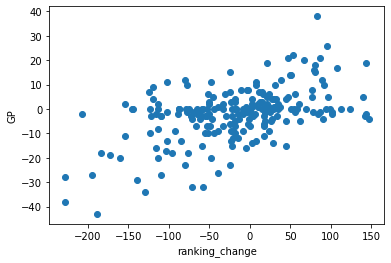

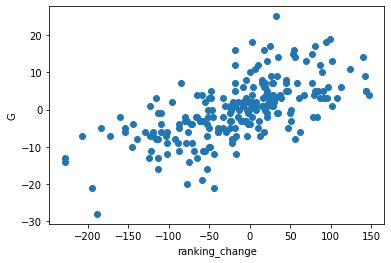

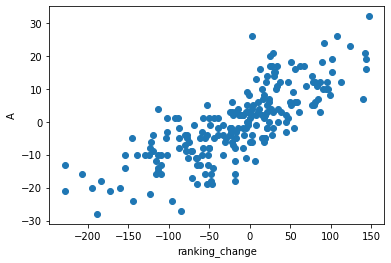

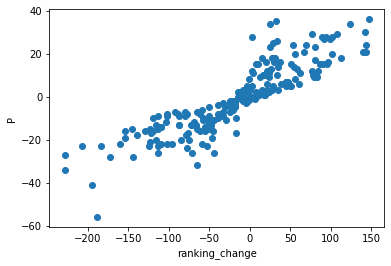

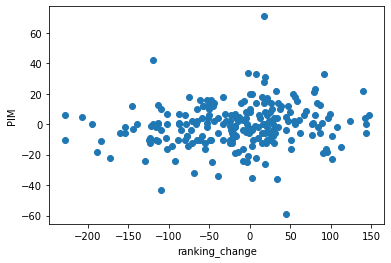

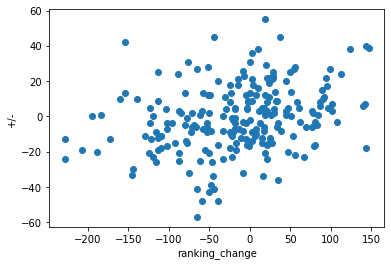

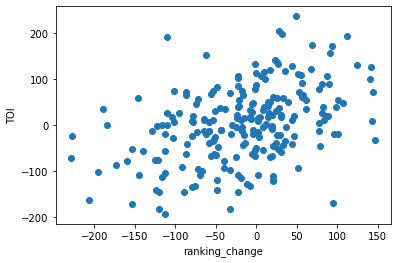

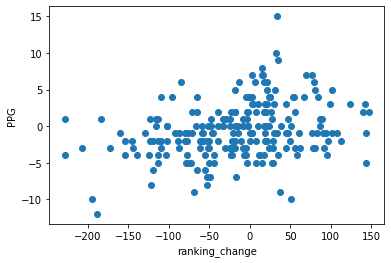

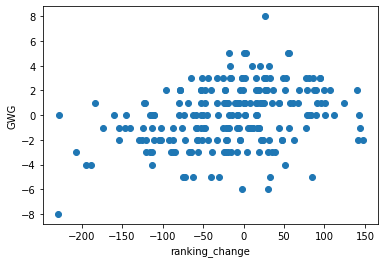

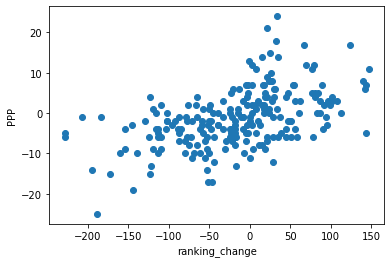

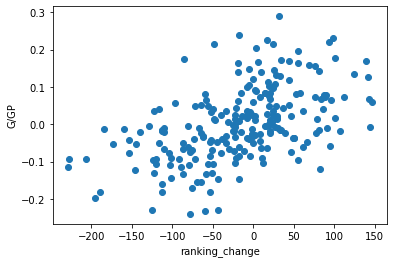

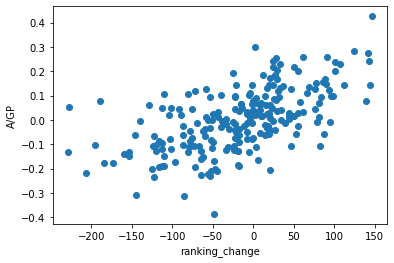

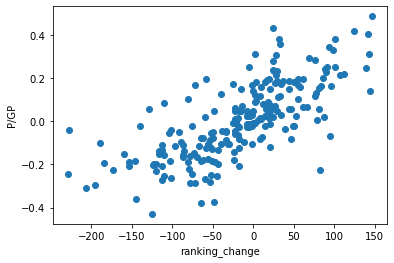

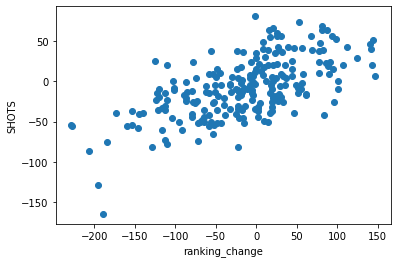

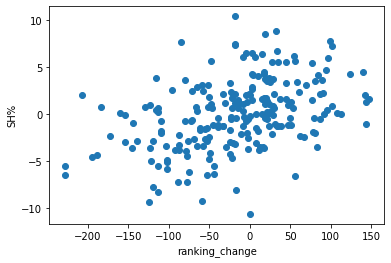

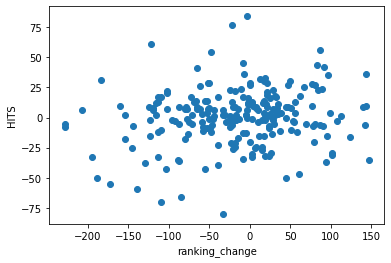

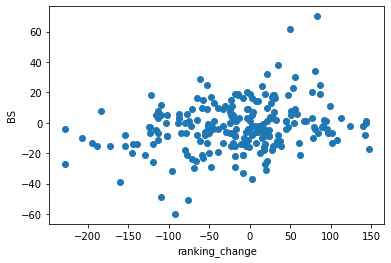

In [24]:
# Plotting every column except 'Name' and 'Rk' agaist "Rk".
# Here, we can visually see how change in each statistic correlates with change in players' change in ranking.

for col in change_st.columns:
    if col in ['Name', 'Rk']:
        continue
    plt.scatter(change_st['Rk'], change_st[col])
    plt.xlabel('ranking_change')
    plt.ylabel(col)
    plt.show()

hello
